In [2]:
# 기본 패키지
import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 
plt.style.use(['ggplot'])

# 변수 생성 패키지
import datetime

# 한글 시각화시 필요 모듈
import platform # 사용자 운영체제 확인
platform.system()
## 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
## 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'


# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore') 


# 버전 확인
print('Pandas : %s'%(pd.__version__))
print('seaborn : %s'%(sns.__version__))
print('matplotlib : %s'%(matplotlib.__version__))
!python --version

Pandas : 1.2.1
seaborn : 0.11.1
matplotlib : 3.5.1
Python 3.8.13


## Load Data

In [3]:
loan = pd.read_csv('../data/loan_fillna.csv')
# loan = pd.read_csv('../data/loan_result.csv')

# log = pd.read_csv('../data/log_data.csv')

user = pd.read_csv('../data/user_fillna.csv')
# user = pd.read_csv('../data/user_spec.csv')

대출이력이 있는 고객 feature 생성

In [4]:
loan_true = loan[loan['is_applied'] == 1]
loan_true_list = loan_true['application_id'].unique()

tempt = []

for i in range(len(user['application_id'])):
    if user['application_id'][i] in loan_true_list:
        tempt.append(1)
    else:
        tempt.append(0)
        
user['loan_history'] = tempt

insert time 날짜 변경

In [33]:
# insert time : 한도조회 당시 시간
user['insert_time'] = pd.to_datetime(user['insert_time'])

In [95]:
# 해결안됨

# user2.loc[user2['birth_year'] == "없음", 'birth_year'] = "9999.0"
# user2['birth_year'].unique()
# 현재나이
dt_now = datetime.datetime.now()
user2.loc[user2['birth_year'] == "없음", 'birth_year'] = "9999.0"
user2['age'] = user2['birth_year'].str[:-2].astype(int) - dt_now.year
pd.to_datetime(user2['birth_year'],format = '%Y')
user2.head()

array(['1985.0', '1968.0', '1997.0', '1989.0', '2000.0', '1994.0',
       '1976.0', '1992.0', '1991.0', '1980.0', '1981.0', '1987.0',
       '1986.0', '1996.0', '1990.0', '1965.0', '1993.0', '1978.0',
       '1974.0', '1984.0', '1983.0', '2001.0', '1975.0', '1995.0',
       '1998.0', '1962.0', '1972.0', '1982.0', '1988.0', '1979.0',
       '1963.0', '1959.0', '1967.0', '1957.0', '1999.0', '1971.0',
       '1977.0', '1955.0', '1973.0', '2002.0', '1969.0', '1966.0',
       '1964.0', '1970.0', '1947.0', '1960.0', '1958.0', '1961.0',
       '1943.0', '1948.0', 9999, '1954.0', '1932.0', '1939.0', '1951.0',
       '1956.0', '1953.0', '1945.0', '1952.0', '1950.0', '2003.0',
       '1942.0', '1946.0', '1934.0', '1949.0', '1938.0', '1941.0',
       '1940.0', '1944.0', '1936.0', '1933.0', '1937.0', '2004.0',
       '1931.0', '1935.0', '2005.0', '2006.0', '1927.0', '2007.0',
       '2008.0', '1930.0', '1929.0'], dtype=object)

나이

In [6]:
dt_now = datetime.datetime.now()

def create_age(x):
    if x != '없음':
        return dt_now.year - int(x[:-2])
    else:
        return x
    
user['age'] = user['birth_year'].apply(create_age)

In [30]:
user[['birth_year','age']]

,birth_year,age
0,1985.0,37
1,1968.0,54
2,1997.0,25
3,1989.0,33
4,2000.0,22
...,...,...
1394211,2000.0,22
1394212,1955.0,67
1394213,1983.0,39
1394214,1975.0,47


연령대

In [8]:
def age_group(x):
    if x == "없음":
        return x
    if int(x) < 20 :
        return '10대'
    elif int(x) < 30 :
        return '20대'
    elif int(x) < 40 :
        return '30대'
    elif int(x) < 50 :
        return '40대' 
    elif int(x) < 60 :
        return '50대'
    elif int(x) < 70 :
        return '60대'
    elif int(x) < 80:
        return '70대'
    else:
        return '80대 이상'
    
user['age_group'] = user['age'].apply(age_group)

In [29]:
user[['age','age_group']]

,age,age_group
0,37,30대
1,54,50대
2,25,20대
3,33,30대
4,22,20대
...,...,...
1394211,22,20대
1394212,67,60대
1394213,39,30대
1394214,47,40대


<AxesSubplot:xlabel='age_group', ylabel='count'>

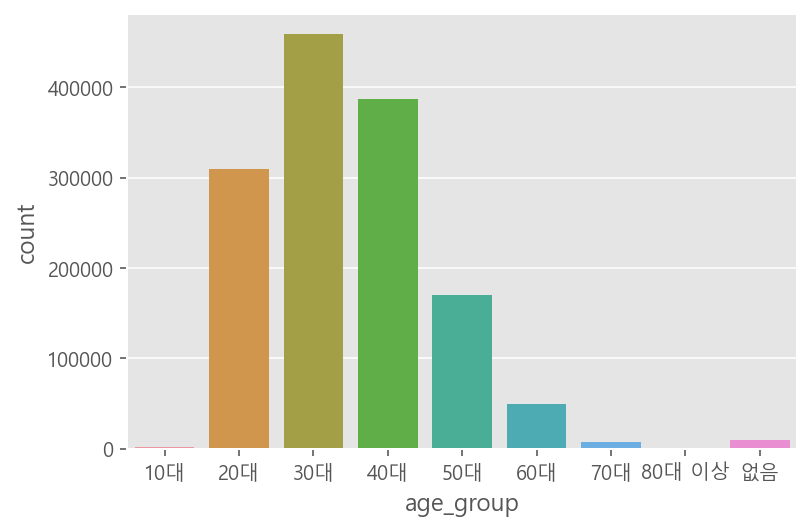

In [10]:
sns.countplot(user['age_group'], order = sorted(user['age_group'].unique()))

신용등급

In [11]:
'''
finda 신용등급은 코리아크레딧뷰로(KCB)사용
1 : 942 ~ 1000
2 : 891 ~ 941
3 : 832 ~ 890
4 : 768 ~ 831
5 : 698 ~ 767
6 : 630 ~ 697
7 : 530 ~ 629
8 : 454 ~ 529
9 : 335 ~ 453
10 : 0 ~ 334
'''

def credit_rating(x):
    if x >= 942:
        return "1"
    elif x >= 891:
        return "2"
    elif x >= 832:
        return "3"
    elif x >= 768:
        return "4"
    elif x >= 698:
        return "5"
    elif x >= 630:
        return "6"
    elif x >= 530:
        return "7"
    elif x >= 454:
        return "8"
    elif x >= 335:
        return "9"
    else:
        return "10"
    
user['credit_rating'] = user['credit_score'].apply(credit_rating)

In [31]:
user[['credit_score','credit_rating']]

,credit_score,credit_rating
0,660.000000,6
1,870.000000,3
2,710.000000,5
3,820.000000,4
4,630.000000,6
...,...,...
1394211,590.000000,7
1394212,980.000000,1
1394213,750.000000,5
1394214,640.000000,6


<AxesSubplot:xlabel='credit_rating', ylabel='count'>

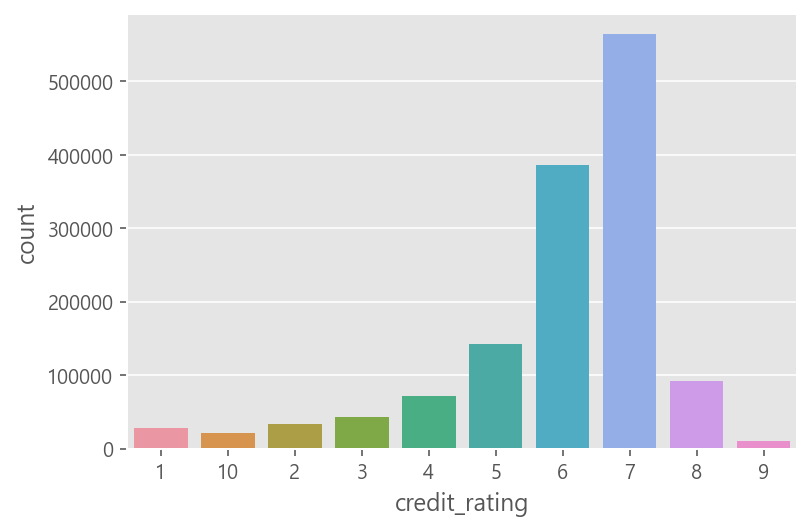

In [13]:
sns.countplot(user['credit_rating'], order = sorted(user['credit_rating'].unique()))

소득등급

In [ ]:
# 상세 소득수준(ex.연령대별 평균과 비교) or 세분화된 소득분위(ex.10등급으로 세분, 장학재단에서 사용하는 소득분위) 추가

In [32]:
percent = user['yearly_income'].describe()

def income_rating(x):
    if x < percent[4]:
        return 4
    elif x < percent[5]:
        return 3
    elif x < percent[6]:
        return 2
    else:
        return 1

user['income_rating'] = user['yearly_income'].apply(income_rating)

In [27]:
print(percent[4])
print(percent[5])
print(percent[6])

25000000.0
34000000.0
48000000.0


In [33]:
user[['yearly_income','income_rating']]

,yearly_income,income_rating
0,108000000.0,1
1,30000000.0,3
2,30000000.0,3
3,62000000.0,1
4,36000000.0,2
...,...,...
1394211,25000000.0,3
1394212,20000000.0,4
1394213,75000000.0,1
1394214,50000000.0,1


<AxesSubplot:xlabel='income_rating', ylabel='count'>

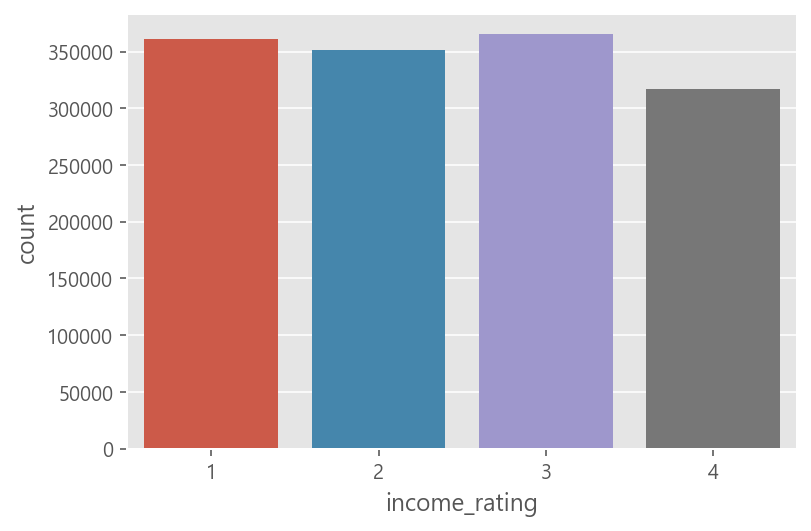

In [34]:
sns.countplot(user['income_rating'], order = sorted(user['income_rating'].unique()))

근속년수

In [77]:
dt_now = datetime.datetime.now()

def service_year(x):
    if x != "입사년도 없음":
        return dt_now.year - int(x[:4]) + 1
    else:
        return x

user['service_year'] = user['company_enter_month'].apply(service_year)

In [78]:
user[['company_enter_month','service_year']]

,company_enter_month,service_year
0,20151101.0,8
1,20070201.0,16
2,20210901.0,2
3,20170101.0,6
4,20210901.0,2
...,...,...
1394211,202106.0,2
1394212,입사년도 없음,입사년도 없음
1394213,200908.0,14
1394214,201705.0,6


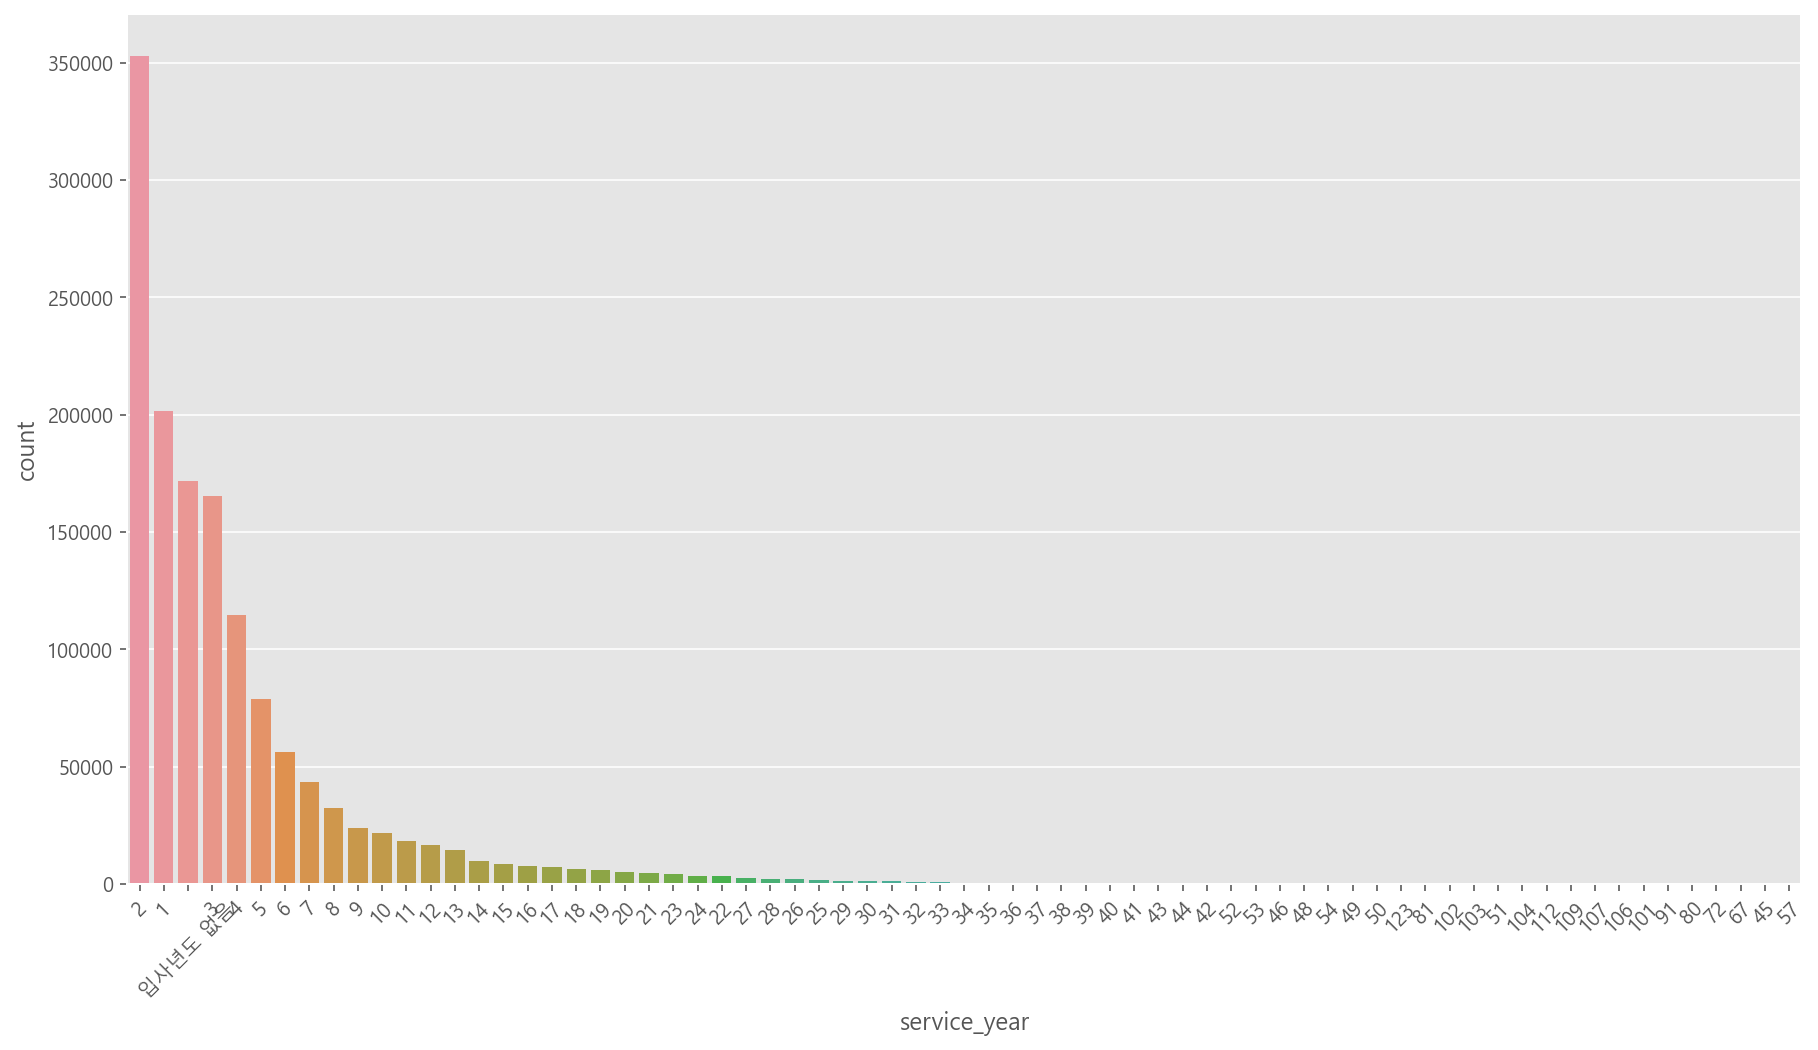

In [79]:
plt.figure(figsize = (15,8))
sns.countplot(user['service_year'], order = user['service_year'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

기대출 평균 금액

In [4]:
user['avg_existing_loan_amt'] = user['existing_loan_amt'] / user['existing_loan_cnt']

In [5]:
user[['existing_loan_amt','existing_loan_cnt','avg_existing_loan_amt']]

,existing_loan_amt,existing_loan_cnt,avg_existing_loan_amt
0,162000000.0,4.0,4.050000e+07
1,27000000.0,1.0,2.700000e+07
2,15000000.0,5.0,3.000000e+06
3,344000000.0,7.0,4.914286e+07
4,16000000.0,1.0,1.600000e+07
...,...,...,...
1394211,0.0,0.0,NaN
1394212,0.0,1.0,0.000000e+00
1394213,200000000.0,8.0,2.500000e+07
1394214,117000000.0,10.0,1.170000e+07


대출 조회 건수

In [23]:
count = user.groupby('user_id')['application_id'].count()

user['application_count'] = user['user_id'].apply(lambda x : count[x])

In [24]:
user[['user_id','application_count']]

,user_id,application_count
0,118218,15
1,553686,4
2,59516,2
3,167320,7
4,33400,10
...,...,...
1394211,489900,1
1394212,151422,1
1394213,173524,1
1394214,766546,5


<AxesSubplot:xlabel='application_count', ylabel='Density'>

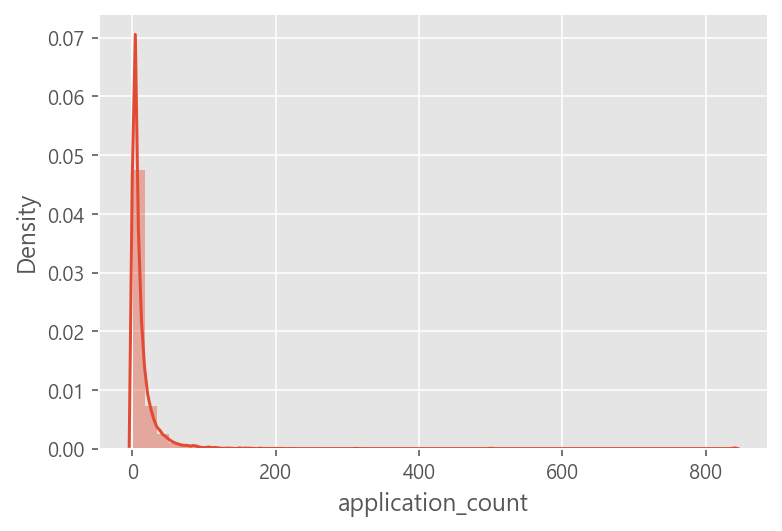

In [31]:
sns.distplot(user['application_count'])

신용평가 시간

In [71]:
def insert_classification(x):
    if 2 <= x <= 5:
        return "새벽"
    elif x <= 9:
        return "아침"
    elif x <= 13:
        return "점심"
    elif x <= 18:
        return "낮"
    elif x <= 22:
        return "저녁"
    else:
        return "밤"
    
user['insert_classification'] = user['insert_time'].dt.hour.apply(insert_classification)

In [72]:
user[['insert_time','insert_classification']]

,insert_time,insert_classification
0,2022-06-07 06:28:18,아침
1,2022-06-07 14:29:03,낮
2,2022-06-07 21:40:22,저녁
3,2022-06-07 09:40:27,아침
4,2022-06-07 08:55:07,아침
...,...,...
1394211,2022-03-22 14:55:32,낮
1394212,2022-03-22 01:19:24,아침
1394213,2022-03-22 07:34:32,아침
1394214,2022-03-22 22:12:35,저녁


<AxesSubplot:xlabel='insert_classification', ylabel='count'>

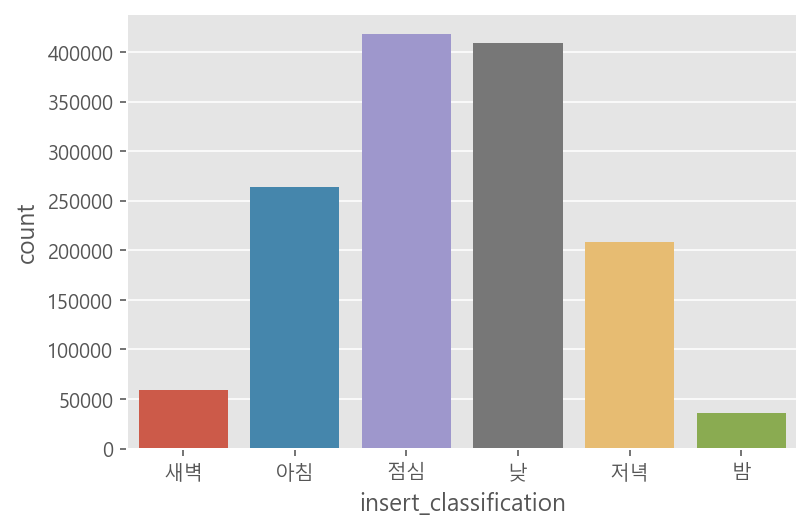

In [73]:
sns.countplot(user['insert_classification'], order = ['새벽', '아침', '점심','낮','저녁','밤'])

income_type 별 소득 수준

In [141]:
# income_type = user.groupby('income_type')['yearly_income'].agg('mean')
income_type = user.groupby('income_type')['yearly_income'].agg('median')

user['income_income_level'] = user.apply(lambda x: "직장없음" if x['income_type'] == "직장없음" else 
                                         ("평균 미만" if x['yearly_income'] < income_type[x['income_type']] else "평균 이상"), axis = 1)

In [140]:
user.groupby('income_type')['yearly_income'].agg('median')

income_type
EARNEDINCOME       35000000.0
EARNEDINCOME2      30000000.0
FREELANCER         30000000.0
OTHERINCOME        20000000.0
PRACTITIONER       36000000.0
PRIVATEBUSINESS    50000000.0
직장없음                      0.0
Name: yearly_income, dtype: float64

In [143]:
user[['income_type','yearly_income','income_income_level']]

,income_type,yearly_income,income_income_level
0,PRIVATEBUSINESS,108000000.0,평균 이상
1,PRIVATEBUSINESS,30000000.0,평균 미만
2,FREELANCER,30000000.0,평균 이상
3,EARNEDINCOME,62000000.0,평균 이상
4,EARNEDINCOME,36000000.0,평균 이상
...,...,...,...
1394211,FREELANCER,25000000.0,평균 미만
1394212,OTHERINCOME,20000000.0,평균 이상
1394213,EARNEDINCOME,75000000.0,평균 이상
1394214,EARNEDINCOME,50000000.0,평균 이상


<AxesSubplot:xlabel='income_income_level', ylabel='count'>

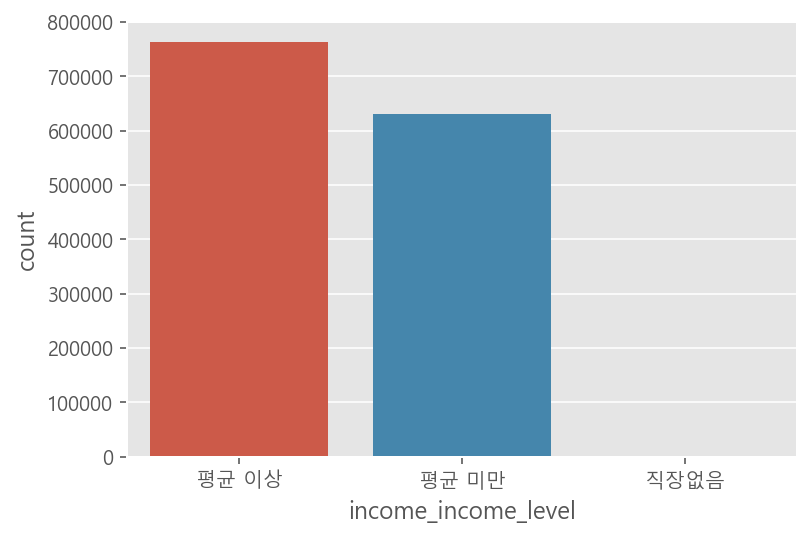

In [142]:
sns.countplot(user['income_income_level'])

In [127]:
user.groupby('income_type')['yearly_income'].agg('mean')

income_type
EARNEDINCOME       4.368105e+07
EARNEDINCOME2      3.697141e+07
FREELANCER         3.793608e+07
OTHERINCOME        2.799042e+07
PRACTITIONER       5.222569e+07
PRIVATEBUSINESS    7.019950e+07
직장없음               0.000000e+00
Name: yearly_income, dtype: float64

In [118]:
user[['income_type','yearly_income','income_income_level']]

,income_type,yearly_income,income_income_level
0,PRIVATEBUSINESS,108000000.0,평균 이상
1,PRIVATEBUSINESS,30000000.0,평균 미만
2,FREELANCER,30000000.0,평균 미만
3,EARNEDINCOME,62000000.0,평균 이상
4,EARNEDINCOME,36000000.0,평균 미만
...,...,...,...
1394211,FREELANCER,25000000.0,평균 미만
1394212,OTHERINCOME,20000000.0,평균 미만
1394213,EARNEDINCOME,75000000.0,평균 이상
1394214,EARNEDINCOME,50000000.0,평균 이상


<AxesSubplot:xlabel='income_income_level', ylabel='count'>

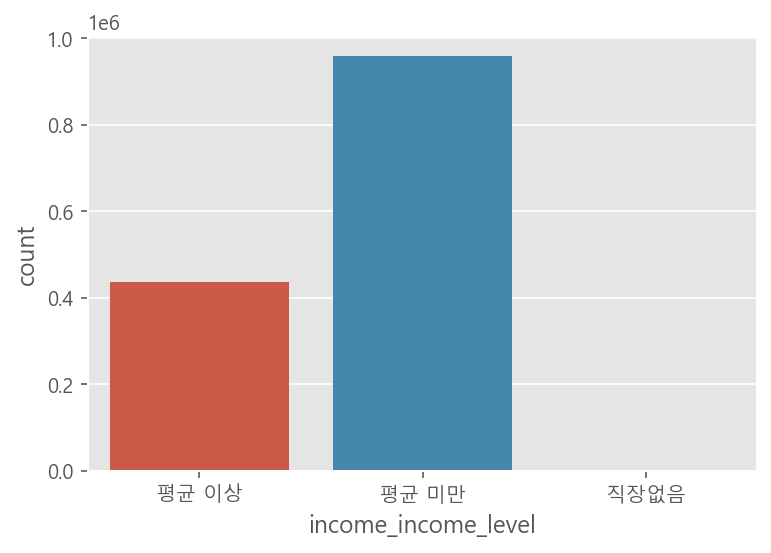

In [119]:
sns.countplot(user['income_income_level'])

income_type 별 소득 수준

In [144]:
# employment_type = user.groupby('employment_type')['yearly_income'].agg('mean')
employment_type = user.groupby('employment_type')['yearly_income'].agg('median')

user['employment_income_level'] = user.apply(lambda x: "평균 미만" if x['yearly_income'] < employment_type[x['employment_type']] 
                                             else "평균 이상", axis = 1)

In [145]:
user.groupby('employment_type')['yearly_income'].agg('median')

employment_type
계약직    30000000.0
기타     28000000.0
일용직    37000000.0
정규직    36000000.0
Name: yearly_income, dtype: float64

In [146]:
user[['employment_type','yearly_income','employment_income_level']]

,employment_type,yearly_income,employment_income_level
0,기타,108000000.0,평균 이상
1,정규직,30000000.0,평균 미만
2,기타,30000000.0,평균 이상
3,정규직,62000000.0,평균 이상
4,정규직,36000000.0,평균 이상
...,...,...,...
1394211,기타,25000000.0,평균 미만
1394212,기타,20000000.0,평균 미만
1394213,정규직,75000000.0,평균 이상
1394214,정규직,50000000.0,평균 이상


<AxesSubplot:xlabel='employment_income_level', ylabel='count'>

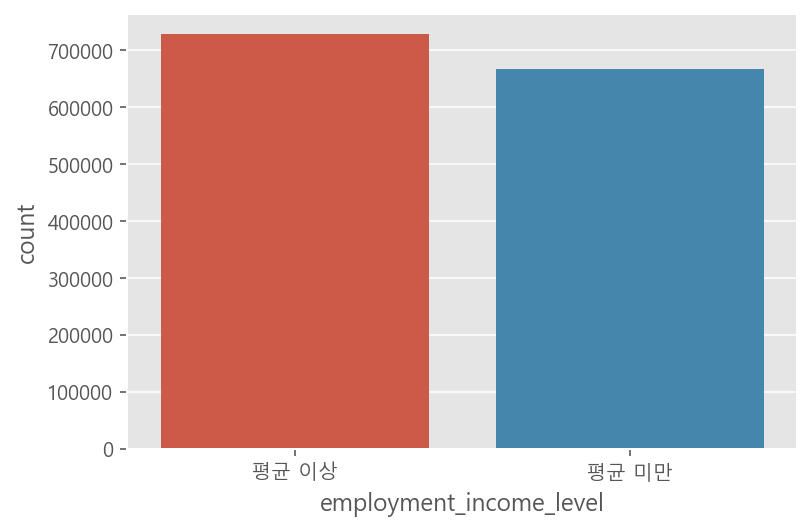

In [147]:
sns.countplot(user['employment_income_level'])

In [128]:
user.groupby('employment_type')['yearly_income'].agg('mean')

employment_type
계약직    3.601986e+07
기타     3.734001e+07
일용직    4.315255e+07
정규직    4.666084e+07
Name: yearly_income, dtype: float64

In [125]:
user[['employment_type','yearly_income','employment_income_level']]

,employment_type,yearly_income,employment_income_level
0,기타,108000000.0,평균 이상
1,정규직,30000000.0,평균 미만
2,기타,30000000.0,평균 미만
3,정규직,62000000.0,평균 이상
4,정규직,36000000.0,평균 미만
...,...,...,...
1394211,기타,25000000.0,평균 미만
1394212,기타,20000000.0,평균 미만
1394213,정규직,75000000.0,평균 이상
1394214,정규직,50000000.0,평균 이상


<AxesSubplot:xlabel='employment_income_level', ylabel='count'>

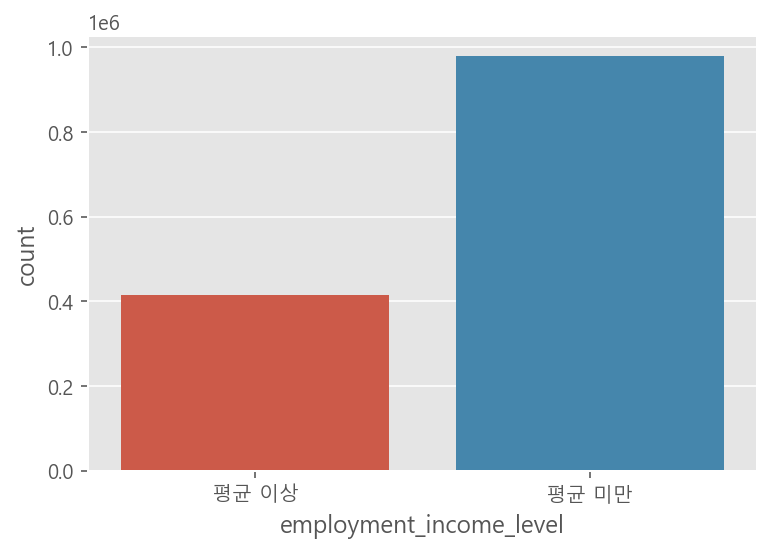

In [129]:
sns.countplot(user['employment_income_level'])

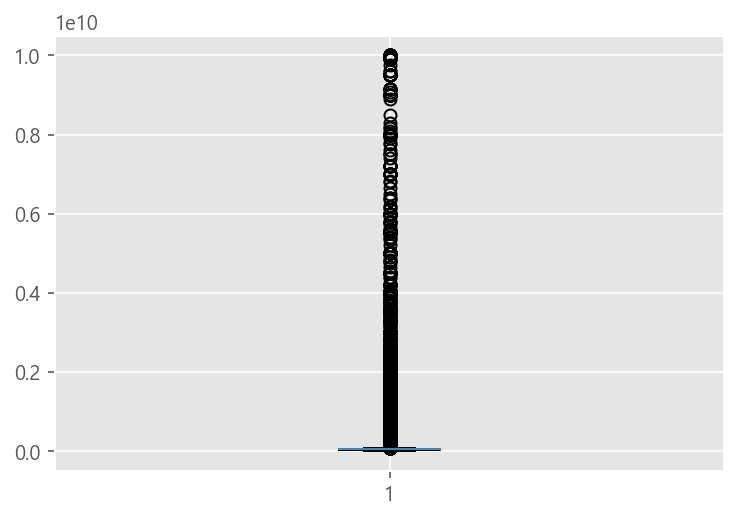

In [148]:
# 평균으로 하면 평균 미만인 데이터가 너무 많아 중앙값으로 실행
plt.boxplot(user['yearly_income'])
plt.show()

연소득 대비 대출 희망금액 비율

In [149]:
user['income_desired_ratio'] = user['desired_amount'] / user['yearly_income']

In [150]:
user[['desired_amount','yearly_income','income_desired_ratio']]

,desired_amount,yearly_income,income_desired_ratio
0,1000000.0,108000000.0,0.009259
1,30000000.0,30000000.0,1.000000
2,10000000.0,30000000.0,0.333333
3,2000000.0,62000000.0,0.032258
4,5000000.0,36000000.0,0.138889
...,...,...,...
1394211,5000000.0,25000000.0,0.200000
1394212,50000000.0,20000000.0,2.500000
1394213,100000000.0,75000000.0,1.333333
1394214,10000000.0,50000000.0,0.200000


연소득 대비 기대출 금액 비율

In [152]:
user['income_existing_ratio'] = user['existing_loan_amt'] / user['yearly_income']

In [153]:
user[['existing_loan_amt','yearly_income','income_existing_ratio']]

,existing_loan_amt,yearly_income,income_existing_ratio
0,162000000.0,108000000.0,1.500000
1,27000000.0,30000000.0,0.900000
2,15000000.0,30000000.0,0.500000
3,344000000.0,62000000.0,5.548387
4,16000000.0,36000000.0,0.444444
...,...,...,...
1394211,0.0,25000000.0,0.000000
1394212,0.0,20000000.0,0.000000
1394213,200000000.0,75000000.0,2.666667
1394214,117000000.0,50000000.0,2.340000


In [28]:
user.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,avg_existing_loan_amt,application_count
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0,2.0,4.0,162000000.0,4.050000e+07,15
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0,2.0,1.0,27000000.0,2.700000e+07,4
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0,2.0,5.0,15000000.0,3.000000e+06,2
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0,2.0,7.0,344000000.0,4.914286e+07,7
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,1,0.0,1.0,16000000.0,1.600000e+07,10


In [17]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1394216 non-null  object 
 3   gender                               1394216 non-null  object 
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1394216 non-null  float64
 6   yearly_income                        1394216 non-null  float64
 7   income_type                          1394216 non-null  object 
 8   company_enter_month                  1394216 non-null  object 
 9   employment_type                      1394216 non-null  object 
 10  houseown_type                        1394216 non-null  object 
 11

In [17]:
user2 = user.copy()

## loan 변수 생성

In [90]:
loan.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,month
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,6
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,6
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,6
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,6
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,6


In [91]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527337 entries, 0 to 13527336
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
 7   month                  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 825.6+ MB


loanapply_insert_time 날짜 변경

In [92]:
loan['loanapply_insert_time'] = pd.to_datetime(loan['loanapply_insert_time'])

In [98]:
loan['loanapply_insert_time'][:4].unique()

array(['2022-06-07T13:05:41.000000000'], dtype='datetime64[ns]')

In [99]:
loan['loanapply_insert_time']

0          2022-06-07 13:05:41
1          2022-06-07 13:05:41
2          2022-06-07 13:05:41
3          2022-06-07 13:05:41
4          2022-06-07 13:05:41
                   ...        
13527332   2022-06-03 12:01:58
13527333   2022-06-03 12:01:49
13527334   2022-06-03 12:01:48
13527335   2022-06-03 12:01:48
13527336   2022-06-03 12:01:48
Name: loanapply_insert_time, Length: 13527337, dtype: datetime64[ns]

In [ ]:
'''
# user
연소득/신용점수
기대출금액/연소득
'''

'''
타깃 불균형이 심하다보니 이걸 해결할 수 있는 방법
회귀 문제에는 우선 user_spec, loan_result 데이터를 사용해보고 
군집화문제에 log_data를 추가적으로 사용하는 방법

credit_score'가 극단적으로 낮은 경우가 몇 개 있음
핀다 사용자 10명 중 6명은 중금리대출
인터넷 은행이 채우지 못한 중금리대출의 니즈를 채워줌
'''

In [ ]:
user.to_csv('feature_user.csv')

In [ ]:
loan.to_csv('feature_loan.csv')

In [218]:
# 데이터 병합
data = pd.merge(loan, user, on = "application_id").reset_index(drop = True)
data.to_csv("../data/data.csv")